<a href="https://colab.research.google.com/github/coderinspain/kivy-boilerplate/blob/master/TF_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Description: This program uses the Double Exponential Moving Average(DEMA) to determine when to buy and sell stocks


In [16]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [17]:
from google.colab import files
files.upload()

Saving AMZN.csv to AMZN (1).csv


{'AMZN.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2019-12-20,1799.619995,1802.969971,1782.449951,1786.500000,1786.500000,5150800\n2019-12-23,1788.260010,1793.000000,1784.510010,1793.000000,1793.000000,2136400\n2019-12-24,1793.810059,1795.569946,1787.579956,1789.209961,1789.209961,881300\n2019-12-26,1801.010010,1870.459961,1799.500000,1868.770020,1868.770020,6005400\n2019-12-27,1882.920044,1901.400024,1866.010010,1869.800049,1869.800049,6186600\n2019-12-30,1874.000000,1884.000000,1840.619995,1846.890015,1846.890015,3674700\n2019-12-31,1842.000000,1853.260010,1832.229980,1847.839966,1847.839966,2506500\n2020-01-02,1875.000000,1898.010010,1864.150024,1898.010010,1898.010010,4029000\n2020-01-03,1864.500000,1886.199951,1864.500000,1874.969971,1874.969971,3764400\n2020-01-06,1860.000000,1903.689941,1860.000000,1902.880005,1902.880005,4061800\n2020-01-07,1904.500000,1913.890015,1892.040039,1906.859985,1906.859985,4044900\n2020-01-08,1898.040039,1911.000000,1886.439941,1891.969971,1891

In [18]:
#Store the data
df = pd.read_csv('AMZN.csv')
#Set the data as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-12-20,2019-12-20,1799.619995,1802.969971,1782.449951,1786.500000,1786.500000,5150800
2019-12-23,2019-12-23,1788.260010,1793.000000,1784.510010,1793.000000,1793.000000,2136400
2019-12-24,2019-12-24,1793.810059,1795.569946,1787.579956,1789.209961,1789.209961,881300
2019-12-26,2019-12-26,1801.010010,1870.459961,1799.500000,1868.770020,1868.770020,6005400
2019-12-27,2019-12-27,1882.920044,1901.400024,1866.010010,1869.800049,1869.800049,6186600
...,...,...,...,...,...,...,...
2020-12-14,2020-12-14,3143.000000,3190.469971,3126.000000,3156.969971,3156.969971,4155800
2020-12-15,2020-12-15,3181.010010,3188.500000,3130.489990,3165.120117,3165.120117,3323700
2020-12-16,2020-12-16,3176.010010,3247.000000,3163.679932,3240.959961,3240.959961,4427600
2020-12-17,2020-12-17,3250.000000,3263.510010,3221.000000,3236.080078,3236.080078,3474300


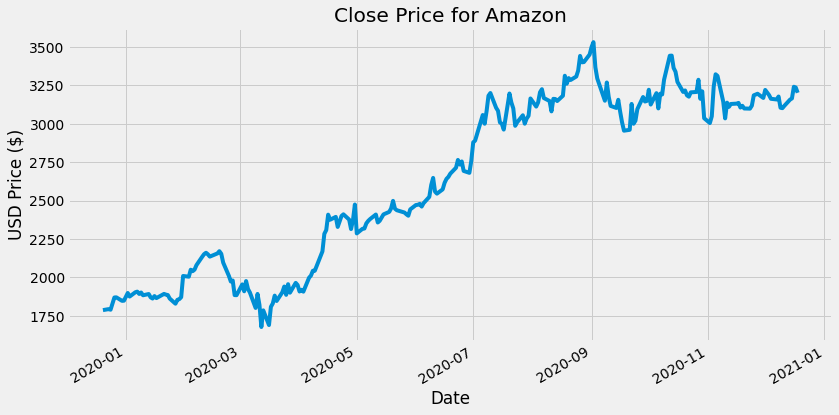

In [30]:
#Visually show the close price
df['Close'].plot(figsize=(12.2, 6.4))
plt.title('Close Price for Amazon')
plt.ylabel('USD Price ($)')
plt.xlabel('Date')
plt.show()

In [40]:
#Create a function to calculate the Double Exponential Moving Average (DEMA) 
def DEMA(data, time_period, column):
  #Calculate the Exponential Moving Average for some time period
  EMA = data[column].ewm(span=time_period, adjust = False).mean()
  #Calculate the DEMA
  DEMA = 2 * EMA - EMA.ewm(span=time_period, adjust = False).mean()
  
  return DEMA

In [42]:
#Store the short term DEMA (20 day period) and the long term DEMA (50 day period) into the data set
df['DEMA_short'] = DEMA(df, 20, 'Close')
df['DEMA_long'] = DEMA(df, 50, 'Close')


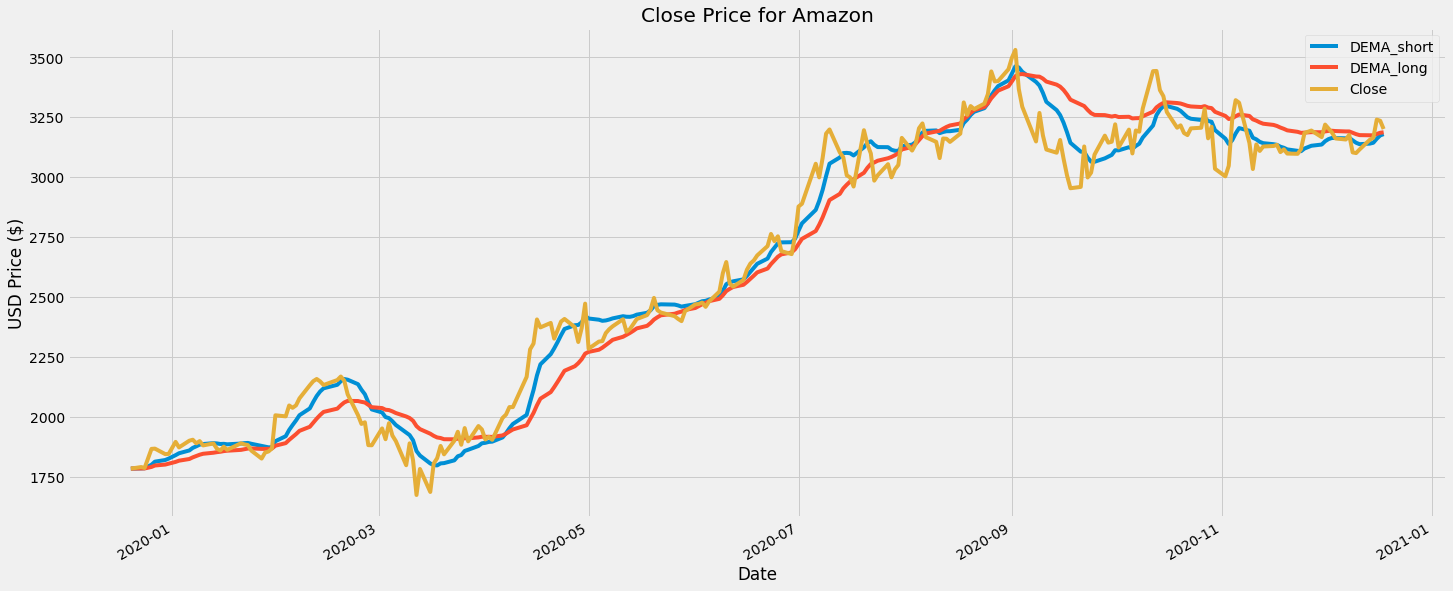

In [49]:
#Plot the chart
#Create a list of columns to keep
column_list = ['DEMA_short', 'DEMA_long', 'Close']
df[column_list].plot(figsize=(22, 10))
plt.title('Close Price for Amazon')
plt.ylabel('USD Price ($)')
plt.xlabel('Date')
plt.show()

In [81]:
#Create a function to buy and sell the stock (The trading strategy)
def DEMA_strategy(data):
  buy_list = []
  sell_list = []
  flag = False
  #Loop through the data
  for i in range(0, len(data)):
    if data['DEMA_short'][i] > data['DEMA_long'][i] and flag == False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag = True
    elif data['DEMA_short'][i] < data['DEMA_long'][i] and flag == True: 
      buy_list.append(np.nan)
      sell_list.append(data['Close'][i])
      flag = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)

  #Store the buy and sell signals/ lista into the data set
  data['Buy'] = buy_list
  data['Sell'] = sell_list

In [82]:
#Run the strategy to get the buy and sell signals
DEMA_strategy(df)

<function matplotlib.pyplot.show>

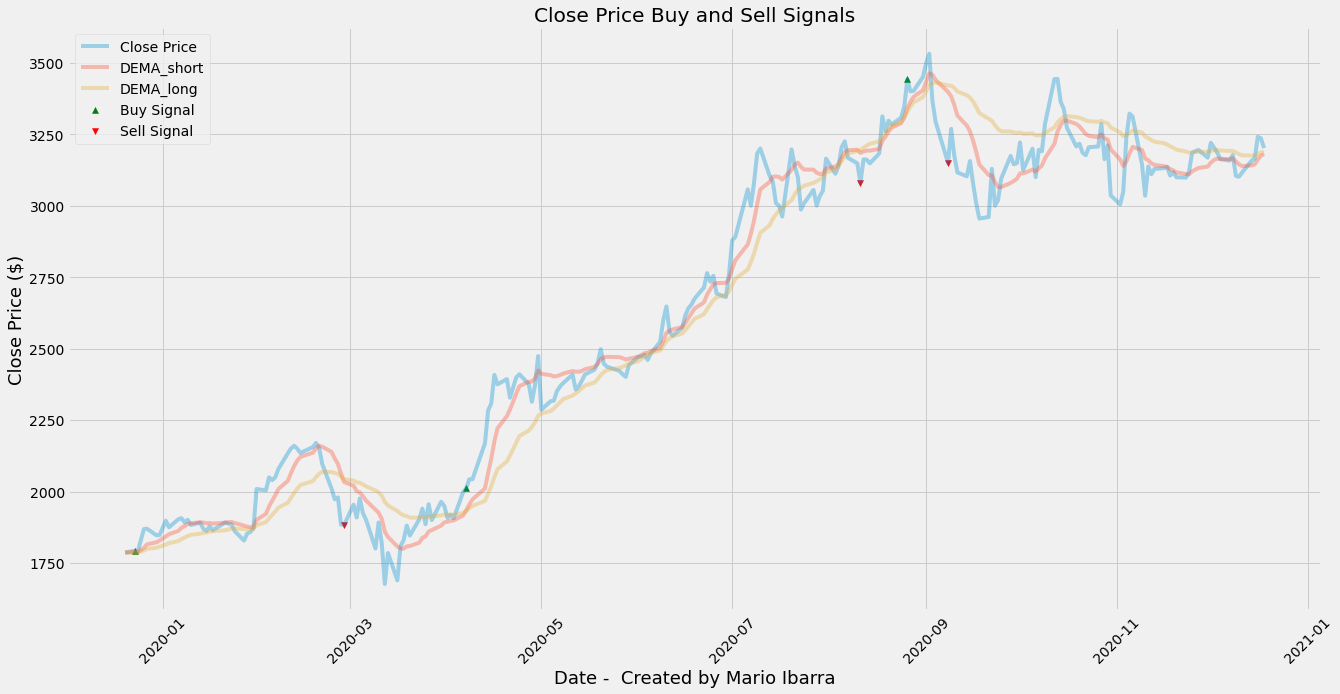

In [90]:
#Visually show the stock buy and sell signals
plt.figure(figsize=(20, 10))
plt.scatter(df.index, df['Buy'], color='green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell'], color='red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot(df['Close'], label = 'Close Price', alpha = 0.35)
plt.plot(df['DEMA_short'], label = 'DEMA_short', alpha = 0.35)
plt.plot(df['DEMA_long'], label = 'DEMA_long', alpha = 0.35)
plt.xticks(rotation=45)
plt.title('Close Price Buy and Sell Signals')
plt.xlabel('Date -  Created by Mario Ibarra', fontsize = 18)
plt.ylabel('Close Price ($)', fontsize = 18)
plt.legend(loc='upper left')
plt.show